
![image](https://drive.google.com/uc?id=1iBMNGCrSdaLK9SD6BjsuNjB1DjHVkLZl)


Welcome to the lab! Before we get started here are a few pointers on Jupyter notebooks.

1. The notebook is composed of cells; cells can contain code which you can run by click on the play button.


2. To interrupt cell execution, click the ```Stop``` button on the side of the cell.

# **Lab 2(solution) Car Object Detection**

In this Lab we will try to build a car object detector to helps in the recognition and localization of multiple car instances in an image.

The predicted output from the object detector will the label of the object and the bounding box to denote the location of the object. In the following, you can see an example of the object detector predicted 2 objects with label vehicle and 2 bounding boxes to indicate the objects' location.

![image](https://drive.google.com/uc?id=1a8Wr4zlQ7cXVtxx7y4xTeVzVMOPD_GDg)


Similar to the Classification problem, we need to collect the data for training. We will collect images that contain cars and provide labels. For Object Detection problem we also need to annotate the locations of the cars in the images to be part of the label. With the prepared dataset, we can do training with the Object Detection neural network.





We will build the car object detector based on the following steps

1.   Collect images for the class car
2.   Annotate each of the objects inside the images 
3.   Train the model with the training set and evaluate it performance
4.   Prediction using trained model




Install modules 

**There are some modules incompatibility but we are not using it. When encounter the error just press restart runtime and continue next cell**

In [1]:

!pip install tensorflow==2.4.0
!pip install imageai==2.1.6




Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 394.8/394.8 MB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.9/14.9 MB 40.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 32.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.0/462.0 KB 27.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 86.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4849 sha256=3e0e34655a943ecb26a6b36eef80a06bd77b65fb55444516d5240d087a2864a5
  Stored in directory: /root/.cache/pip/wheels/a0/16/9c/5473df82468f958445479c59e784896fa24f4a5fc024b0f501
  Created wheel for wrapt: filename=wrapt-1.12.1-cp38-cp38-linux_x86_64.whl

# **1. Collect images for the class car**

We have pre-collected about 25 images of the car for this lab.  It is split into 20 images for training and  5 images for validation.

It is stored in the following dataset directory.

For train data, it is stored in the path ./Lab2dataset/data/train.
```
./Lab2dataset/data/train
                           |- annotations
                           |- images
                   
```
For train data, it is stored in the path ./Lab2dataset/data/validation.
```
./Lab2dataset/data/validation 
                           |- annotations
                           |- images
```



Download the data and unzip it.

In [2]:
!wget https://nyp-aicourse.s3-ap-southeast-1.amazonaws.com/aiup/day2-am/Lab2dataset.zip
!unzip Lab2dataset.zip

--2023-01-04 11:01:40--  https://nyp-aicourse.s3-ap-southeast-1.amazonaws.com/aiup/day2-am/Lab2dataset.zip
Resolving nyp-aicourse.s3-ap-southeast-1.amazonaws.com (nyp-aicourse.s3-ap-southeast-1.amazonaws.com)... 52.219.128.99
Connecting to nyp-aicourse.s3-ap-southeast-1.amazonaws.com (nyp-aicourse.s3-ap-southeast-1.amazonaws.com)|52.219.128.99|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 485277653 (463M) [application/zip]
Saving to: ‘Lab2dataset.zip’

Lab2dataset.zip     100%[===================>] 462.80M  6.80MB/s    in 42s     

2023-01-04 11:02:23 (11.0 MB/s) - ‘Lab2dataset.zip’ saved [485277653/485277653]

Archive:  Lab2dataset.zip
   creating: Lab2dataset/
   creating: Lab2dataset/cache/
  inflating: Lab2dataset/image1.jpg  
  inflating: Lab2dataset/image2.jpg  
  inflating: Lab2dataset/image3.jpg  
  inflating: Lab2dataset/image4.jpg  
  inflating: Lab2dataset/image5.jpg  
  inflating: Lab2dataset/image6.jpg  
   creating: Lab2dataset/json/
  inflatin

### Exercise


Try to display different images with the following code.

- Set image directory and file name in the imread() function eg.  data_path_train_images+'img1.jpg'

If you can do so, that means the dataset is copied correctly into the lab directory.


In [2]:

data_dir_path='Lab2dataset/'
models_path=data_dir_path+'models/'
data_path_train_images=data_dir_path+'train/images/'
data_path_validation_images= data_dir_path+'validation/images/'

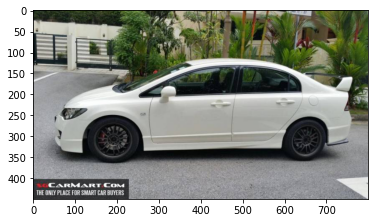

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# TODO: complete the code below
img = mpimg.imread(data_path_train_images+"img1.jpg")
plt.imshow(img)

# **2. Annotate each of the objects inside the image**

In this section we will try to practice how to label and annotate image data. With the help of the LabelImage application, we can label the object and define bounding box parameters.

This exercise will be running on the local computer with the Window OS.


Link to [Annotation exercise](Lab2_Annotation.md)

# **3. Train the model with the training set and evaluate it performance**

YOLO(Your Only Look Once) is very popular because it achieves high accuracy while also being able to run in real-time. The algorithm “only looks once” at the image in the sense that it only requires the image or the video to pass through the neural network once to make predictions.

With YOLO, a single CNN simultaneously predicts multiple bounding boxes and class probabilities for those boxes. This means they recognize where the object is at and uses bounding boxes to show where it is at, and uses class probability to determine what the object is.


![image](https://drive.google.com/uc?id=16IMqEc7bhPz0zPE-iD2SosFqA0hgK5kb)


### Exercise

In this exercise we are going to define the Custom YOLO Object Detection model and perform training.

We will reuse a YOLO pre-trained model in our problem, this is also known as transfer learning. Transfer learning exploits the knowledge gained from a previous task to improve generalization about another. 

Complete the following steps to add the codes.

- Set the image dataset directory for the training. Remember we have copy our dataset to the directory /dataset/Lab2dataset/data/train previously. Define the directory inside the function trainer.setDataDirectory(data_directory= directory)

   
- Set our YOLO object detection model training parameters in the following function 
```
trainer.setTrainConfig()
```

    *   object_names_array : this is an array containing the names of the objects in our dataset(in our case we labeled it car) eg. ['car']
    *   batch_size : The batch size allow large dataset to be able to load into the model for training
    *   num_experiments : The number of times the network will train over all the training images, which is also called epochs
    *   train_from_pretrained_model : pre-trained YOLOv3 model file name



- Set the num_experiements=5 and run the training. Use the Jupyter file browser, goto directory './dataset/Lab2dataset/models/'. How many weigths files are stored in the directory? How do you know which weight is the best trianed model?
<details><summary>Click here for answer</summary> 
<br/>
There are 5 files beacause we setted the iterations to be 5.
The file name is form using iteration number and the loss value.
 eg. detection_model-ex-025--loss-0005.643.h5
 From the smallest loss value of the file name we can determine which is the best weights.  
<br/>
</details>


You can use these different trained weights to test the prediction in the next exercise.


In [4]:

from imageai.Detection.Custom import DetectionModelTrainer
trainer = DetectionModelTrainer()
trainer.setModelTypeAsYOLOv3()

# TODO: complete the code below-add the main path where data is stored
trainer.setDataDirectory(data_directory=  data_dir_path)
                         
# TODO: complete the code below-Set the training parameters 
trainer.setTrainConfig(object_names_array=['car'], num_experiments=20,batch_size=4, train_from_pretrained_model=data_dir_path+"pretrained-yolov3.h5")

trainer.trainModel()

Generating anchor boxes for training images and annotation...
Average IOU for 9 anchors: 0.89
Anchor Boxes generated.
Detection configuration saved in  Lab2dataset/json/detection_config.json
Evaluating over 6 samples taken from Lab2dataset/validation
Training over 20 samples  given at Lab2dataset/train
Training on: 	['car']
Training with Batch Size:  4
Number of Training Samples:  20
Number of Validation Samples:  6
Number of Experiments:  20


Training with transfer learning from pretrained Model


/usr/local/lib/python3.8/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
/usr/local/lib/python3.8/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3503: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  warnings.warn(


Epoch 1/20


KeyboardInterrupt: ignored

# 4. Prediction using trained model

The trained object detection model will predict the objects’ output labels with the corresponding bounding boxes.


### Exercise
For this exercise, we will load the trained weight into the YOLO neural network and perform the prediction.

- Choose one of the weights file from the previous exercise. Choose weights with ex-005, assign the directory and file name in the following YOLO neural network function. eg. models_path+'detection_model-ex-005-loss-0016.248.h5'
```
detector.setModelPath()
```
- Assign the prediction image directory and file name to the following YOLO neural network function. Give a directory and different file name to store the predicted result. eg. data_dir_path+"image1.jpg"
```
detector.detectObjectsFromImage()
```


- Run the prediction and observe the output. What do the 3 values represent on each line? 
<details><summary>Click here for answer</summary> 
<br/>
the 3 values are label name, probability and bounding box. 
The label name shows the object being classified and the probability displayed how confidence the object being predicted. And the box points show the localization of the object using the bottom left coordinate and the upper right coordinate to form a bounding box.
<br/>
</details>

- Display the image with the predicted result. Add predicted result directory and output image file name to the imread() function(You can find it from the above detector.detectObjectsFromImage() function).



In [ ]:
from imageai.Detection.Custom import CustomObjectDetection
detector = CustomObjectDetection()
detector.setModelTypeAsYOLOv3()

# TODO: complete the code below
detector.setModelPath(models_path+"trained_detection_model-ex-025--loss-0005.643.h5")

detector.setJsonPath(data_dir_path+"json/detection_config.json")

detector.loadModel()

# TODO: complete the code below
detections = detector.detectObjectsFromImage(input_image=data_dir_path+"image1.jpg", output_image_path=data_dir_path+"image1out.jpg")
for detection in detections:
    print(detection["name"], " : ", detection["percentage_probability"], " : ", detection["box_points"])

img = mpimg.imread(data_dir_path+"image1out.jpg")
plt.imshow(img)

Once you have loaded the weights into the YOLO model, you can continue to use it to predict other images.

- Assign another prediction image directory and file name to the following YOLO neural network function. Give a directory and different file name to store the predicted result.eg. data_dir_path+"image2.jpg"

- Display the image with the predicted result. Add directory and output image file name from prediction to the imread() function.

car  :  58.394938707351685  :  [0, 164, 474, 364]
car  :  54.82649803161621  :  [279, 96, 667, 434]


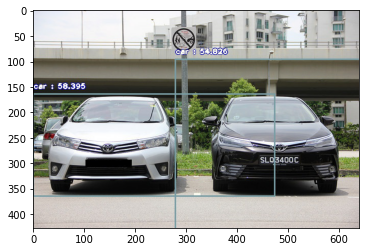

In [ ]:
detections = detector.detectObjectsFromImage(input_image=data_dir_path+"image6.jpg", output_image_path=data_dir_path+"image6out.jpg")
for detection in detections:
    print(detection["name"], " : ", detection["percentage_probability"], " : ", detection["box_points"])

img = mpimg.imread(data_dir_path+"image6out.jpg")
plt.imshow(img)
                                             

Try with the given pre-trained weights(trained_detection_model-ex-025--loss-0005.643.h5) with lower loss value compare with the previous step. 
Compare the probability and the postion of the bounding box with the ones predicted by the model using epoch 3 weights.


In [ ]:
detector = CustomObjectDetection()
detector.setModelTypeAsYOLOv3()

# TODO: complete the code below
detector.setModelPath(models_path+"trained_detection_model-ex-025--loss-0005.643.h5")

detector.setJsonPath(data_dir_path+"json/detection_config.json")

detector.loadModel()

# TODO: complete the code below
detections = detector.detectObjectsFromImage(input_image=data_dir_path+"image1.jpg", output_image_path=data_dir_path+"image1out.jpg")
for detection in detections:
    print(detection["name"], " : ", detection["percentage_probability"], " : ", detection["box_points"])

img = mpimg.imread(data_dir_path+"image1out.jpg")
plt.imshow(img)
                                             

In [ ]:
detections = detector.detectObjectsFromImage(input_image=data_dir_path+"image3.jpg", output_image_path=data_dir_path+"image3out.jpg")
for detection in detections:
    print(detection["name"], " : ", detection["percentage_probability"], " : ", detection["box_points"])

img = mpimg.imread(data_dir_path+"image3out.jpg")
plt.imshow(img)
                   
